array([[  0,   0,   0, ..., 102, 102, 102],
       [  0,   0,   0, ..., 102, 102, 102],
       [  0,   0,   0, ..., 102, 102, 102],
       ...,
       [189, 183,  91, ..., 101,  98,  98],
       [189, 189, 183, ..., 101,  98,  98],
       [147, 147, 183, ...,  98,  98,  98]], dtype=int16)

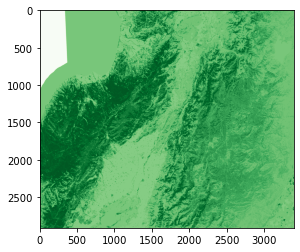

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import plotly.express as px
from itertools import product
fn = 'Downloads/farsite.nc'
ds = nc.Dataset(fn)
ft = ds['US_210F40'][:].data
ds['albers_conical_equal_area']
#pairs = list(product(ds[‘x’][:].data, ds[‘x’][:].data))
#plt.scatter([pair[0] for pair in pairs], [pair[1] for pair in pairs])
plt.imshow(ft,cmap='Greens')
ft

In [2]:
ds_disk = xr.open_dataset(fn)
ds_disk

<xarray.Dataset>
Dimensions:                    (x: 3397, y: 2910)
Coordinates:
  * x                          (x) float64 -2.284e+06 -2.284e+06 ... -2.182e+06
  * y                          (y) float64 1.832e+06 1.832e+06 ... 1.919e+06
Data variables: (12/15)
    albers_conical_equal_area  |S1 ...
    US_210CBD                  (y, x) float32 ...
    US_210CBH                  (y, x) float32 ...
    US_210CC                   (y, x) float32 ...
    US_210CH                   (y, x) float32 ...
    US_210EVC                  (y, x) float32 ...
    ...                         ...
    US_210FVH                  (y, x) float32 ...
    US_210FVT                  (y, x) float32 ...
    US_ASP                     (y, x) float32 ...
    US_DEM                     (y, x) float32 ...
    US_FDIST                   (y, x) float32 ...
    US_SLP                     (y, x) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.3.2, released 2021/09/01
    history:             Fri Feb  4 09:00:45 2022: ncrename -v Band14,US_SLP ...
    NCO:                 netCDF Operators version 4.9.1 (Homepage = http://nc...

In [ ]:
def Calculate_Spot_Fire(xxxxxxxx):
    #Lofting
    
    Determine plume characteristics (for torching tree)

    t_f = eq_34(t_o, z, z_F)
    t_t = eq_35(t_o, t1, t2, t3)
    t1 = eq_36(z_F, v_o, w_F)
    t2 = eq_37(Dp, z_F)
    t3 = eq_38(v_o, w_F, z, Dp, a, b, z_F)

    Flight
    z_t = eq_39(z0, t, tau, v_o0)
    tau = eq_40(v_o0)
    v_o = eq_41(Dp)
    dxdt = eq_42(U_H, z, H)
    U_H = eq_43(U_20pH, H)

    
    Ignition
    Determine if ember lands inside existing fires
    Apply Ignition Frequency
    
    return xxxxxxxx

In [3]:
# Equation Set 7
# Spotting

def eq_34(t_o, z, z_F):
    """
    :param t_o: time of steady burning of tree crowns (min)
    :param z: particul height (m)
    :param z_F: flame height (m)
    :return: t_f, duration of bouyant flow structure of torching tree (min)
    """
    return t_o + 1.2 + (5.963/3.)*(((4.563 + z/z_F)/(5.963))**1.5 - 1)

def eq_35(t_o, t1, t2, t3):
    """
    :param t_o: time of steady burning of tree crowns (min)
    :param t1: time for partical to travel from initial height to flame tip, from eq_36 (min)
    :param t2: time for partical to travel through transition zone from flame tip to bouyant plume, from eq_37 (min)
    :param t3: time for partical to travel inside bouyant plume, from eq_38 (min)
    :return: t_t, time required for partical to travel upward from source (min)
    """
    return t_o + t1 + t2 + t3

def eq_36(z_F, v_o, w_F):
    """
    :param z_F: flame height (m)
    :param v_o: terminal velocity of partical (m/sec)
    :param w_F: flame gas velocity (m/sec)
    :return: t1, time for partical to travel from initial height to flame tip (min)
    """
    # z_o = .4306
    # B = 40
    ln_stuff = np.log((1-v_o/w_F)/((.4306/z_F)**.5 - (v_o)/(w_F)))
    return 1 - (.4306/z_F)**.5 + (v_o/w_F)*ln_stuff

def eq_37(Dp, z_F):
    """
    :param Dp: Partical diameter (m)
    :param z_F: flame height (m)
    :return: t2, time for partical to travel through transition zone from flame tip to bouyant plume (min)
    """
    ln_stuff = np.log(1 + 1/(1-(Dp/z_F)**.5))
    return .2 + 40*((Dp/z_F)**.5)*(1 + 40*((Dp/z_F)**.5)*ln_stuff)

def eq_38(v_o, w_F, z, Dp, a, b, z_F):
    """
    :param z: particul height (m)
    :param v_o: terminal velocity of partical (m/sec)
    :param w_F: flame gas velocity (m/sec)
    :param Dp: Partical diameter (m)
    :param z_F: flame height (m)
    :param a: defines shape of eliptical fire, from eq_15 (vertical radius) (m/min)
    :param b: defines shape of eliptical fire, from eq_16 (horizontal radius) (m/min)
    :return: t3, time for partical to travel inside bouyant plume (min)
    """
    r = ((b + z/z_F)/(a))**.5
    x = v_o/w_F
    ln_stuff = np.log((1-.8*(x))/(1-.8*r*(x)))
    return 5.963/(.8*x)*(ln_stuff - .8*x*(r-1) - .5*((.8*x)**2)*(r-1)**2)
    
def eq_39(z0, t, tau, v_o0):
    """
    :param z0: initial height of partical
    :param t: current time (min)
    :param v_o0: terminal velocity, from eq_41 (m/sec)
    :param tau: from eq_40
    :return: z_t, partical height at time t (m)
    """
    return z0 - v0*(t/tau - .5*(t/tau)**2)

def eq_40(v_o0):
    """
    :param v_o0: terminal velocity, from eq_41 (m/sec)
    :return: tau
    """
    return (4*1.2*v_o0)/(.0064*3.1415*9.8)

def eq_41(Dp):
    """
    :param Dp: Partical diameter (m)
    :return: v_o (okay, so what is v_o0?)
    """
    return ((3.1415*.3*9.8*Dp)/(2*1.2*.0012))**.5

def eq_42(U_H, z, H):
    """
    :param U_H: wind speed at height H, from eq_43 (m/sec)
    :param z: height of partical (m)
    :param H: height of forest canopy (m)
    :return: dXdt, velocity in X direction of partical (m/sec)
    """
    return U_H*np.log(z/.4306)/np.log(H/.4306)

def eq_43(U_20pH, H):
    """
    :param U_20pH: windspeed at twenty feet (6.1 m) over tree height (m/sec)
    :param H: height of canopy (m)
    :return: U_H, wind speed at height H (m/sec)
    """
    return U_20pH/np.log((20+1.18*H)/(.43*H))

z_F is the flame height (m)
we have never calculate the flame height before. Maybe simulate the height based on the burning time + fuel?
or use constant number?

t_o :
using Jamie's model to calculate the time of steady burning of tree crowns (min). And save burning/second in a dictionary and call them here
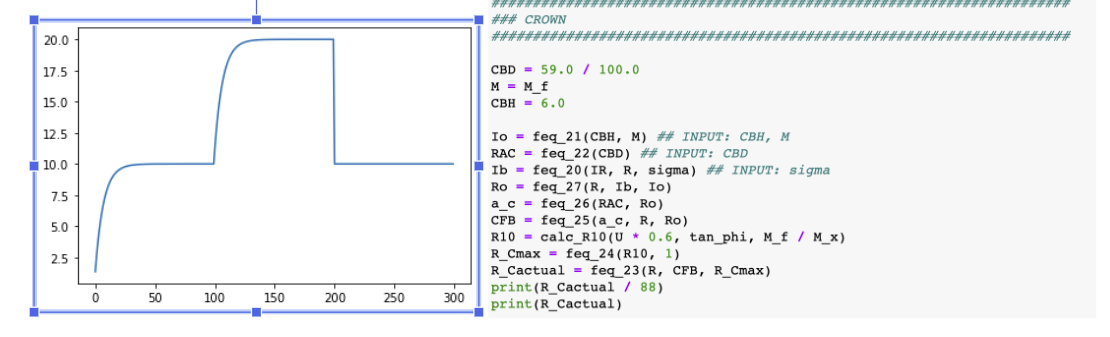
    


t_f = eq_34(t_o, z, z_F)



Missing variable:
1. t_o: time of steady burning of tree crowns (min)
2. flame height (m)
3. flame gas velocity (m/sec)
4. terminal velocity of partical (m/sec)
5. Partical diameter (m)
6. particle height (m) 
7. initial height of partical
8. V0 VS V0(0)
9. U_20ph
    
    

For computing assumption:
1. Particles are assumed to originate at the top of the canopy.
2. The base of the flame is assumed equal to half the stand height.
3. Particles are cylinders with constant specific gravity (0.3 g cm–3) and
drag coefficient CD (1.2).
4. Particles are lofted vertically above the burning tree (for example, no
downwind travel occurs during lofting).

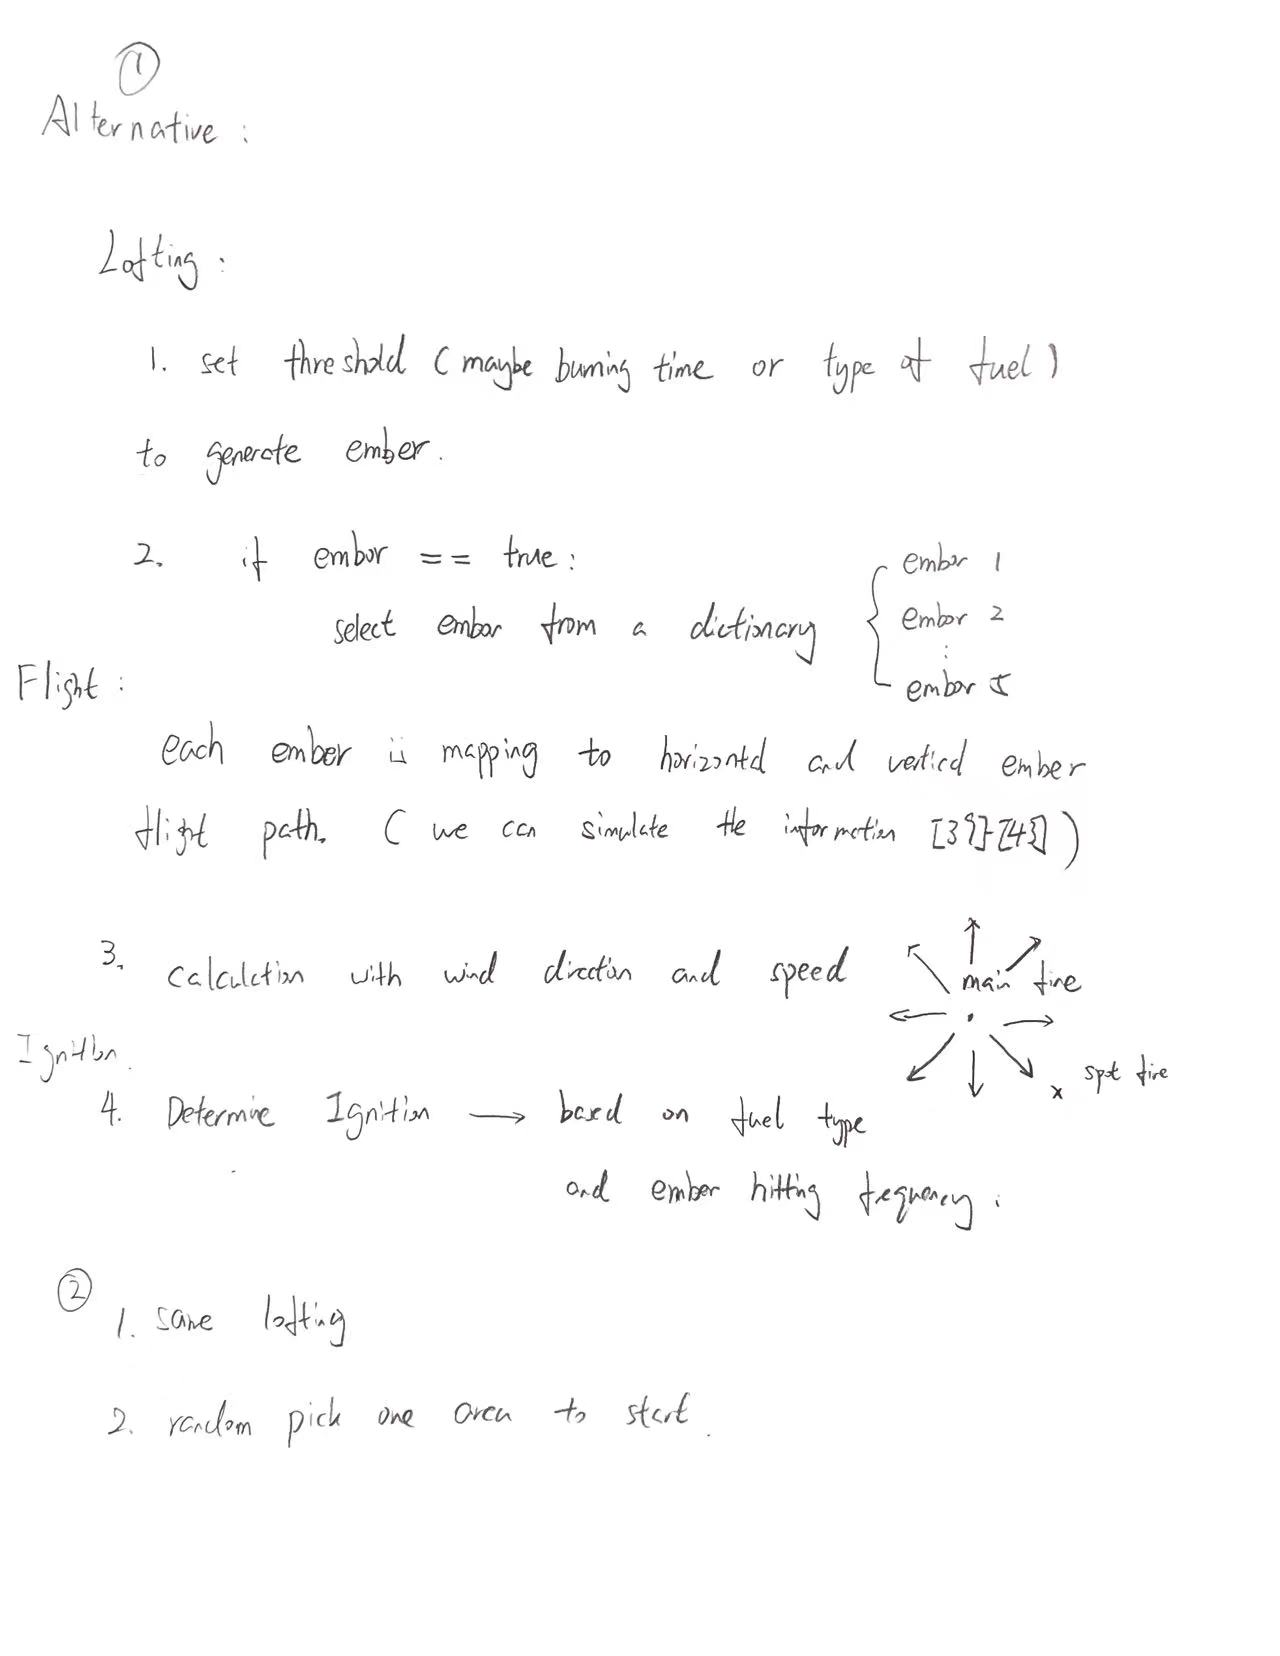